Problem Statment : We need to predict whether the server get hacked or not ?


In [1]:
#  mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
#  change current directory to directory zip data file is located

import os
os.chdir('/content/drive/My Drive/DataHacker/')

In [3]:
# unzip the zip file if file is not present

from zipfile import ZipFile

if os.path.exists('./DS_HK'):
  print("file is already exists")
else:
  with ZipFile('./DS_HK.zip','r') as z:
    z.extractall('/content/drive/My Drive/DataHacker/DS_HK')

file is already exists


In [4]:
#  change current directory to directory data file is located

import os
os.chdir('/content/drive/My Drive/DataHacker/DS_HK/Dataset')

In [5]:
#  list files in that directory

!ls -ltr

total 2365
-rw------- 1 root root 1471574 Jun  9 16:59 Train.csv
-rw------- 1 root root  948884 Jun  9 16:59 Test.csv
-rw------- 1 root root      97 Jun  9 16:59 sample_submission.csv


In [6]:
#  import package for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline
sb.set_style('white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
#  read file data
train = pd.read_csv('Train.csv')

In [14]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In the dataset, Incident id is the ticket created for server which was hacked and date is the date at which server get hacked , we can used date variable only for identifying pattern for montly/weekly.But for this we need proper explaination of X_1 to X_15 variable.

1) Multiple Offense is target variable which has 2 different values
2) X_12 has some missing values we will fill this missing values by its median value

In [16]:
#  drop incident id and date
train.drop(columns=['INCIDENT_ID','DATE'],inplace=True)

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X_1,23856.0,0.483778,1.439738,0.0,0.0,0.0,0.0,7.0
X_2,23856.0,24.791206,15.240231,0.0,7.0,24.0,36.0,52.0
X_3,23856.0,24.637450,15.135093,0.0,8.0,24.0,35.0,52.0
X_4,23856.0,4.276744,2.944672,0.0,2.0,4.0,6.0,10.0
X_5,23856.0,2.455609,1.963095,0.0,1.0,3.0,5.0,5.0
X_6,23856.0,6.154175,4.471756,1.0,3.0,5.0,8.0,19.0
X_7,23856.0,4.876509,3.881931,0.0,2.0,4.0,7.0,18.0
X_8,23856.0,0.972460,1.453144,0.0,0.0,1.0,1.0,99.0
X_9,23856.0,4.924128,1.362625,0.0,5.0,5.0,6.0,6.0
X_10,23856.0,1.244802,1.119301,1.0,1.0,1.0,1.0,90.0


By looking into above statics we can't conclude any thing ,we can analys data by vizual process

In [18]:
# lets fill null values
train.X_12 = train.X_12.fillna(train.X_12.median())

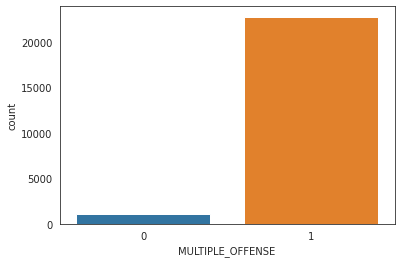

In [19]:
# lets check whther is data is imbalance or not
sb.countplot(x='MULTIPLE_OFFENSE',data=train)

Yes, Data is highly imbalanced , so while training we need make sure that model input should have same proportion of class in training and validation for that we will be using stratified folds

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19e9318e80>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

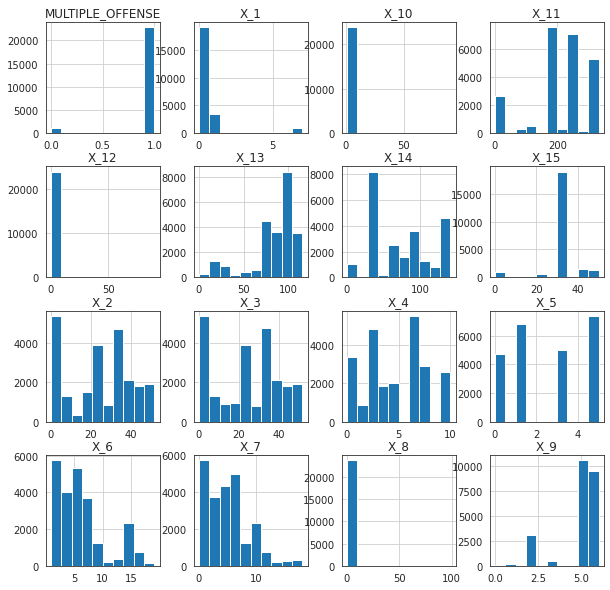

In [22]:
train.hist(figsize=(10,10))

Here , X_7 X_6 X_13 X_11 X_14 X_15 X_1 follows normal distribution but data is skewed, rest of all we can't conclude any thing so we need to kde plot for that

1) X_1 , X_10 , X_5 ,X_12 variable can be categorical as thier values are in certain range, but we will be considering them as a continuous variables

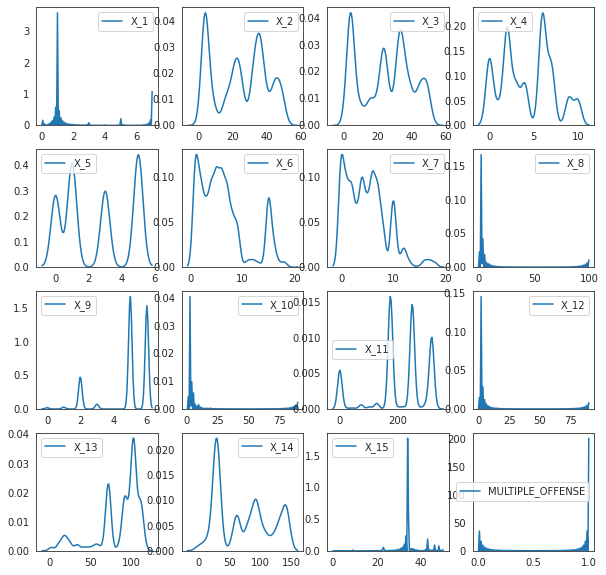

In [25]:
plt.figure(figsize=(10,10))
k = 0
for col in train.columns:
  k+= 1
  plt.subplot(4,4,k)
  sb.kdeplot(train[col])


Here you can see that most of variables are not ND , wo while using distance based algo we need to normalized data.

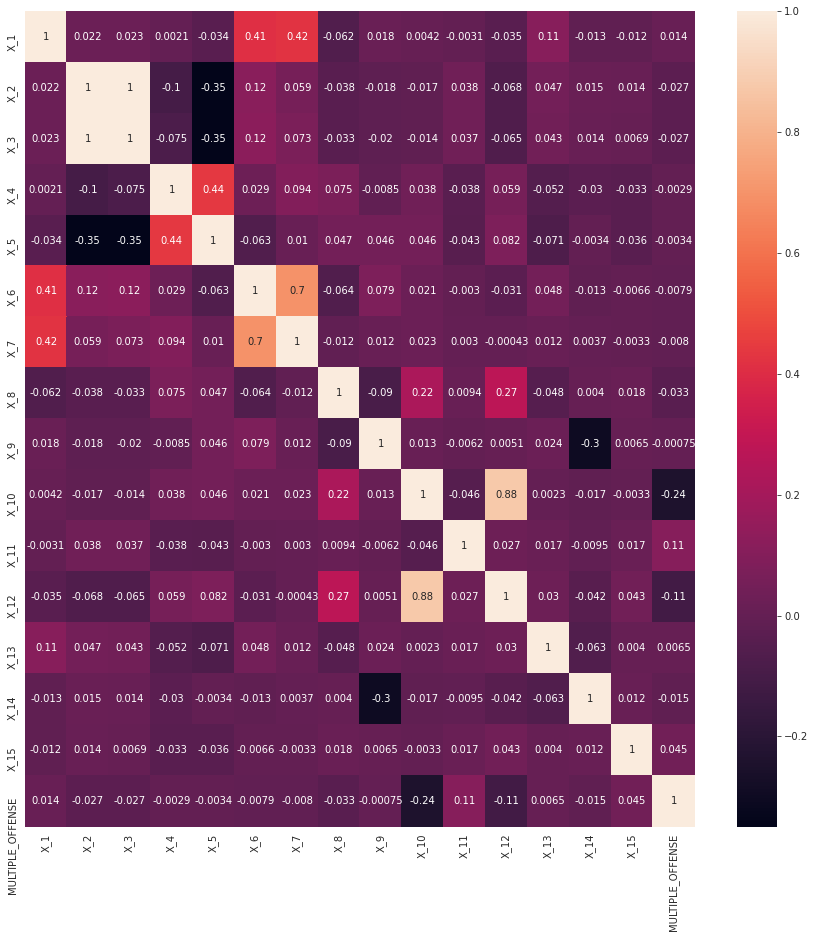

In [28]:
# lets plot correlation plot
plt.figure(figsize=(15,15))
cr = train.corr()
sb.heatmap(cr,annot=True)

Here correlation plot say that 
1) X_12 has high correlation with X_10 or vice versa
2) X_7 has medium correlation with X_6 or vice versa
3) X_3 has high correlation with X_2 or vice versa

by using above info we can drop some of variable as there are some variable high correlation with other variables.

In [30]:
#  import model
from joblib import load,dump
model = load('/content/drive/My Drive/DataHacker/Novartis DS/xgb_model.sav')

After performing various model building we conclude that xgboost work well. 
We 1st tried Regression method (logistic) as a base model but model doesn't perform well.
SVC was overfitted,LIGHTGBM,CATBOOST also overfitted,
so we choose XGB and it work well after fine tunning we achieved near about 99.54 recall on test set

In [49]:
# lets plot feature imp
feat_imp = pd.DataFrame(columns=['Features','Imp'])
feat_imp['Imp'] = model.feature_importances_ * 100
feat_imp['Features'] = train.columns[0:-1]

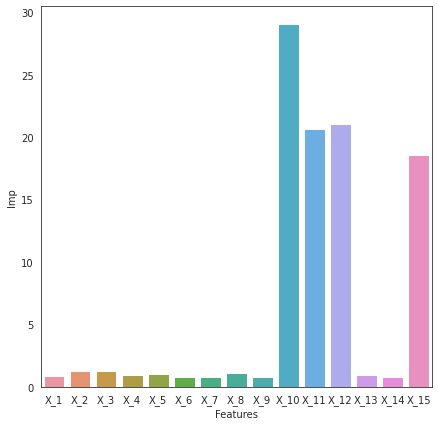

In [52]:
plt.figure(figsize=(7,7))
sb.barplot(x='Features',y='Imp',data=feat_imp)

Here you can see that X_10,X_11,X_12,X_15 contribute the most (so while model building we can used 5-6 variable only which contribute 95% data variance) but we used all variable in model build , this are just insights about model

Summary : 
1) X_10,X_11,X_12,X_15 contribute the most in model
2) X_12 has high correlation with X_10 or vice versa
3) X_7 has medium correlation with X_6 or vice versa
4) X_3 has high correlation with X_2 or vice versa
5)Here , X_7 X_6 X_13 X_11 X_14 X_15 X_1 follows normal distribution but data is skewed, rest of all we can't conclude any thing so we need to kde plot for that
6) X_1 , X_10 , X_5 ,X_12 variable can be categorical as thier values are in certain range, but we will be considering them as a continuous variables
7) Data is highly imbalanced 